# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag
---   ---------------   ---------   ---------   ----
  1   -11.15665102824                   -0.60    6.0
  2   -11.16017507190       -2.45       -1.30    1.0
  3   -11.16039508143       -3.66       -2.33    2.0
  4   -11.16041668900       -4.67       -3.31    3.1
  5   -11.16041704656       -6.45       -3.49    3.4
  6   -11.16041704971       -8.50       -3.67    1.1
  7   -11.16041705106       -8.87       -3.94    2.0
  8   -11.16041705135       -9.54       -4.41    2.0
┌ Warning: Negative ρ detected
│   min_ρ = -3.205767534872404e-16
└ @ DFTK ~/work/DFTK.jl/DFTK.jl/src/densities.jl:5
  9   -11.16041705141      -10.27       -4.76    2.1
┌ Warning: Negative ρ detected
│   min_ρ = -4.236192813938534e-16
└ @ DFTK ~/work/DFTK.jl/DFTK.jl/src/densities.jl:5
 10   -11.16041705143      -10.72       -5.02    1.9
┌ Warning: Negative ρ detected
│   min_ρ = -4.3506845116125484e-16
└ @ DFTK ~/work/DFTK.jl/DFTK.jl/src/densities.jl:5
 11   -11.16

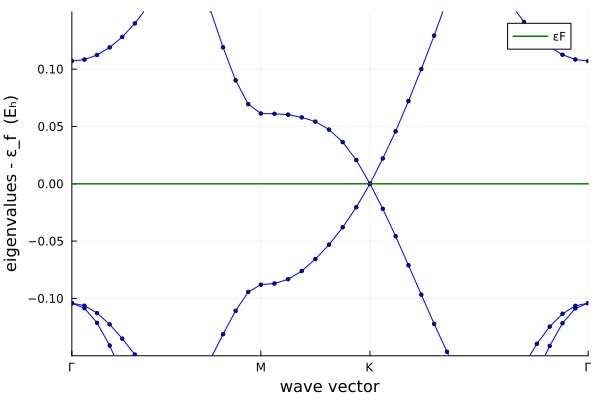

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
sgnum = 13  # Graphene space group number
kpath = irrfbz_path(model; dim=2, sgnum)
plot_bandstructure(scfres, kpath; kline_density=20)